# Análisis comparativo: Inflación vs Salario Mínimo en España
Este análisis estudia la evolución de la inflación y el salario mínimo mensual en España entre los años 1999 y Junio de 2025.

In [9]:
#Importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

In [4]:
#Carga de archivos
ruta= r"C:\\Users\\Usuario\\Desktop\\Curso Titularizado Python\\Practica ChatGPT\\Repositorio3"

pdatos1= pd.read_csv(ruta + "\\ECB Data Portal_20250731105611.csv", encoding="UTF-8")

pdatos2= pd.read_csv(ruta + "\\estat_earn_mw_cur_en.csv", encoding= "UTF-8")

#Creacion de DataFrame
datosInflacion = pd.DataFrame(pdatos1)

datosSalarioMin = pd.DataFrame(pdatos2)


In [5]:
#Procesamiento de datos
#Filtrar informacion de salario minimo
#Filtrar España y preparar columnas.

df_smi = datosSalarioMin [datosSalarioMin['geo'] == 'ES'].copy()
df_smi['year']= df_smi['TIME_PERIOD'].str.slice(0,4).astype(int)
df_smi['smi_mensual'] = df_smi['OBS_VALUE'].astype(float)

# Promedio por año de S1 y S2
df_smi = df_smi.groupby('year')['smi_mensual'].mean().reset_index()


#Filtrar datos de la inflacion
# Extraer el año desde TIME_PERIOD, ej: '1996Jan' → '1996'
datosInflacion['year'] = datosInflacion['TIME PERIOD'].str.slice(0, 4).astype(int)
datosInflacion['inflacion_anual'] = datosInflacion['HICP - Overall index" (ICP.M.ES.N.000000.4.ANR)'].astype(float)

# Agrupar por año y calcular el promedio (promedio anual de inflación)
df_inflacion = datosInflacion.groupby('year')['inflacion_anual'].mean().reset_index()

In [6]:
# Unir salario mínimo + inflación por año
df_merged = pd.merge(df_inflacion, df_smi, on='year', how='inner')
print(df_merged.head())

   year  inflacion_anual  smi_mensual
0  1999         2.216667   502.333333
1  2000         3.475000   513.000000
2  2001         2.833333   523.666667
3  2002         3.575000   536.000000
4  2003         3.116667   543.000000


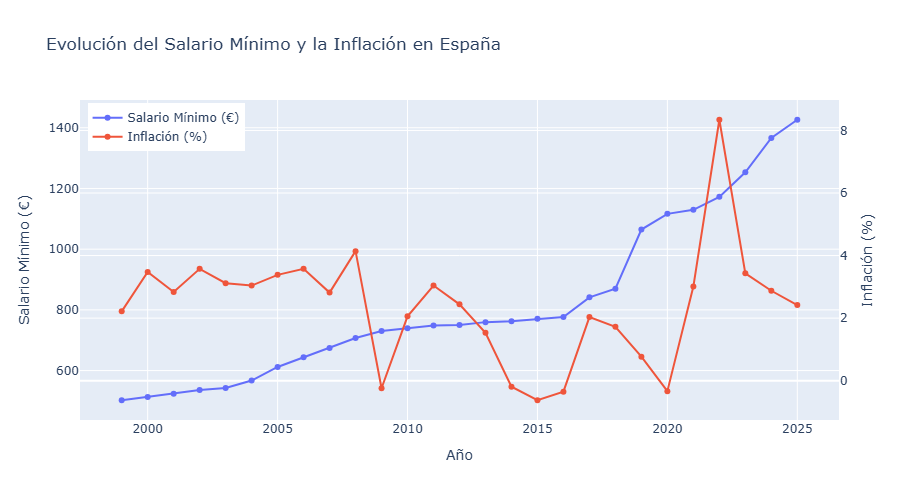

In [7]:
fig = go.Figure()

# Línea del salario mínimo
fig.add_trace(go.Scatter(
    x=df_merged['year'], y=df_merged['smi_mensual'],
    mode='lines+markers',
    name='Salario Mínimo (€)'
))

# Línea de inflación
fig.add_trace(go.Scatter(
    x=df_merged['year'], y=df_merged['inflacion_anual'],
    mode='lines+markers',
    name='Inflación (%)',
    yaxis='y2'
))

# Configuración de ejes
fig.update_layout(
    title='Evolución del Salario Mínimo y la Inflación en España',
    xaxis=dict(title='Año'),
    yaxis=dict(title='Salario Mínimo (€)'),
    yaxis2=dict(
        title='Inflación (%)',
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.01, y=0.99),
    width=900,
    height=500
)

fig.show()

✍️ **Análisis descriptivo de la evolución**

Al observar la evolución del salario mínimo mensual y la inflación anual en España durante el período analizado (1999–2025), se identifican varios patrones relevantes.

En términos generales, el salario mínimo muestra una tendencia creciente sostenida, con incrementos particularmente destacados en determinados años. **Uno de los más relevantes fue en 2019**, cuando el salario mínimo aumentó un 22,42% respecto al año anterior (de 869,66 € a 1064,67 €), frente a una inflación anual de apenas 0,77%. Este salto representa un ajuste salarial significativo en términos reales.

La inflación, por su parte, presenta una evolución más volátil, con años de crecimiento moderado, seguidos por períodos de deflación o subas abruptas.

**A partir de 2019**, se observa una política salarial más activa, con incrementos del salario mínimo que superan ampliamente el ritmo inflacionario, lo cual sugiere una intención de mejorar el poder adquisitivo de los trabajadores con ingresos más bajos.

Sin embargo, en años como **2022**, esta tendencia se revierte parcialmente: la inflación alcanzó un 8,34%, superando el aumento del salario mínimo, lo que refleja una posible pérdida de poder adquisitivo, quizás influenciada por factores macroeconómicos globales como la pospandemia y la crisis energética.

**En los años más recientes**, la brecha entre inflación y salario mínimo tiende a estabilizarse, aunque la inflación elevada podría haber erosionado parte del efecto positivo de los aumentos salariales. Será clave seguir monitoreando esta relación para evaluar si los incrementos nominales realmente se traducen en mejoras del ingreso real.

# Evolución porcentual del aumento de la inflación vs el salario minimo

In [8]:
# Creamos copia de DataFrame
df_comparativo = df_merged.copy()

# Calculo del aumento porcentual del salario mínimo respecto al año anterior
df_comparativo['aumento_smi_pct'] = df_comparativo['smi_mensual'].pct_change() * 100

# Redondeo de los valores para presentación
df_comparativo['aumento_smi_pct'] = df_comparativo['aumento_smi_pct'].round(2)
df_comparativo['inflacion_anual'] = df_comparativo['inflacion_anual'].round(2)
df_comparativo['smi_mensual'] = df_comparativo['smi_mensual'].round(2)

# Reordeo de columnas
df_comparativo = df_comparativo[['year', 'smi_mensual', 'aumento_smi_pct', 'inflacion_anual']]

# Resultado de la tabla
print(df_comparativo.head(10))

   year  smi_mensual  aumento_smi_pct  inflacion_anual
0  1999       502.33              NaN             2.22
1  2000       513.00             2.12             3.48
2  2001       523.67             2.08             2.83
3  2002       536.00             2.36             3.58
4  2003       543.00             1.31             3.12
5  2004       567.33             4.48             3.04
6  2005       612.00             7.87             3.38
7  2006       644.00             5.23             3.58
8  2007       674.33             4.71             2.82
9  2008       707.33             4.89             4.14


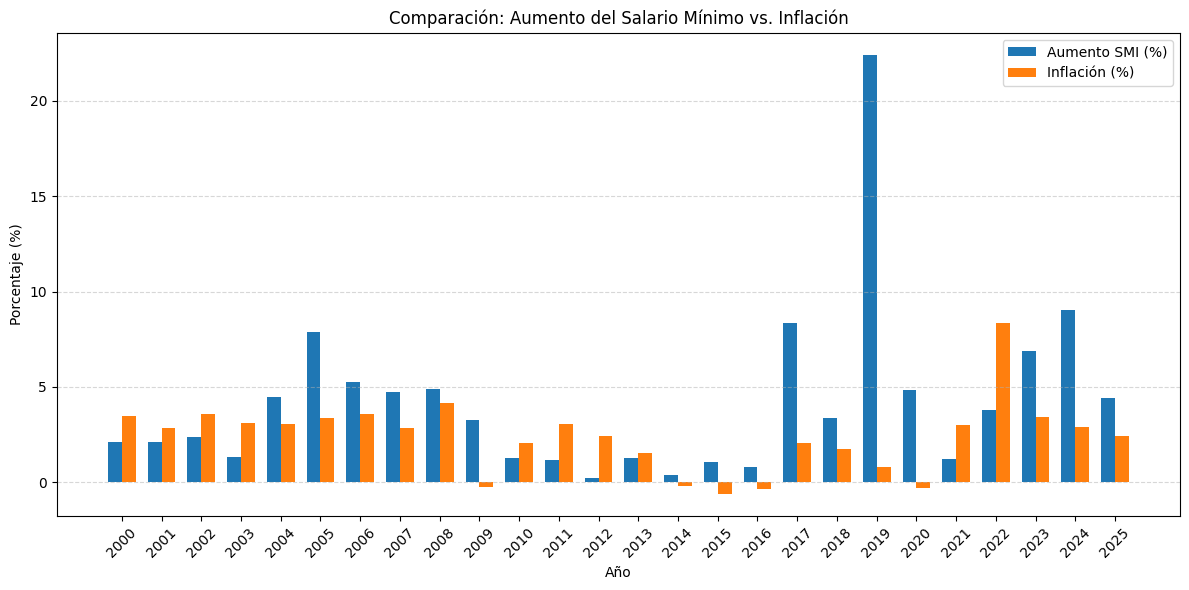

In [10]:
# Filtramos desde el segundo año (porque el primer año tiene NaN)
df_plot = df_comparativo.dropna()

# Posiciones para el eje X
x = np.arange(len(df_plot['year']))
width = 0.35  # ancho de cada barra

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, df_plot['aumento_smi_pct'], width, label='Aumento SMI (%)')
plt.bar(x + width/2, df_plot['inflacion_anual'], width, label='Inflación (%)')

# Etiquetas y formato
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.title('Comparación: Aumento del Salario Mínimo vs. Inflación')
plt.xticks(x, df_plot['year'], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**Total acumulado en el periodo**

In [14]:
# Paso 1: Aumento acumulado del salario mínimo
smi_inicio = df_comparativo['smi_mensual'].iloc[0]
smi_fin = df_comparativo['smi_mensual'].iloc[-1]
aumento_smi_total = ((smi_fin - smi_inicio) / smi_inicio) * 100

# Paso 2: Inflación acumulada compuesta
inflacion_factor = (1 + df_comparativo['inflacion_anual'] / 100).prod()
inflacion_total = (inflacion_factor - 1) * 100

# Mostrar resultados
print(f"Aumento total del salario mínimo (1999–2025): {aumento_smi_total:.2f}%")
print(f"Inflación acumulada en el período: {inflacion_total:.2f}%")

Aumento total del salario mínimo (1999–2025): 183.94%
Inflación acumulada en el período: 87.69%


✅ **Conclusión del total acumulado en el periodo:**

Evolución acumulada (1999–2025):

- Salario mínimo mensual: +183,94%

- Inflación acumulada: +87,69%

Este resultado indica que el salario mínimo le ganó ampliamente a la inflación en el período analizado. En términos reales, esto representa un aumento del poder adquisitivo de los trabajadores que perciben el salario mínimo, duplicando prácticamente el nivel de precios acumulado desde 1999.

Si bien hubo años con pérdidas puntuales de poder adquisitivo (como 2022), la tendencia general muestra un fortalecimiento sostenido del salario mínimo real en España, impulsado especialmente por las políticas salariales implementadas a partir de 2019.

# Calculo del salario mínimo real

In [11]:
#Hacemos una copia de trabajo
df_real = df_comparativo.copy()

# Indice de precios acumulado con base 1999 = 100
# Convertir LA inflación anual a factor multiplicativo
df_real['inflacion_factor'] = 1 + (df_real['inflacion_anual'] / 100)

# Calculo del índice de precios acumulado año a año
df_real['indice_precios'] = df_real['inflacion_factor'].cumprod()

# Normalización del índice para que el año base (1999) sea 100
df_real['indice_precios'] = (df_real['indice_precios'] / df_real['indice_precios'].iloc[0]) * 100

# Calcular salario mínimo real
df_real['smi_real'] = df_real['smi_mensual'] / (df_real['indice_precios'] / 100)

# Redondear columnas clave
df_real[['smi_mensual', 'smi_real']] = df_real[['smi_mensual', 'smi_real']].round(2)

# Mostrar ejemplo
print(df_real[['year', 'smi_mensual', 'smi_real']].head(10))

   year  smi_mensual  smi_real
0  1999       502.33    502.33
1  2000       513.00    495.75
2  2001       523.67    492.13
3  2002       536.00    486.31
4  2003       543.00    477.75
5  2004       567.33    484.43
6  2005       612.00    505.49
7  2006       644.00    513.54
8  2007       674.33    522.98
9  2008       707.33    526.76


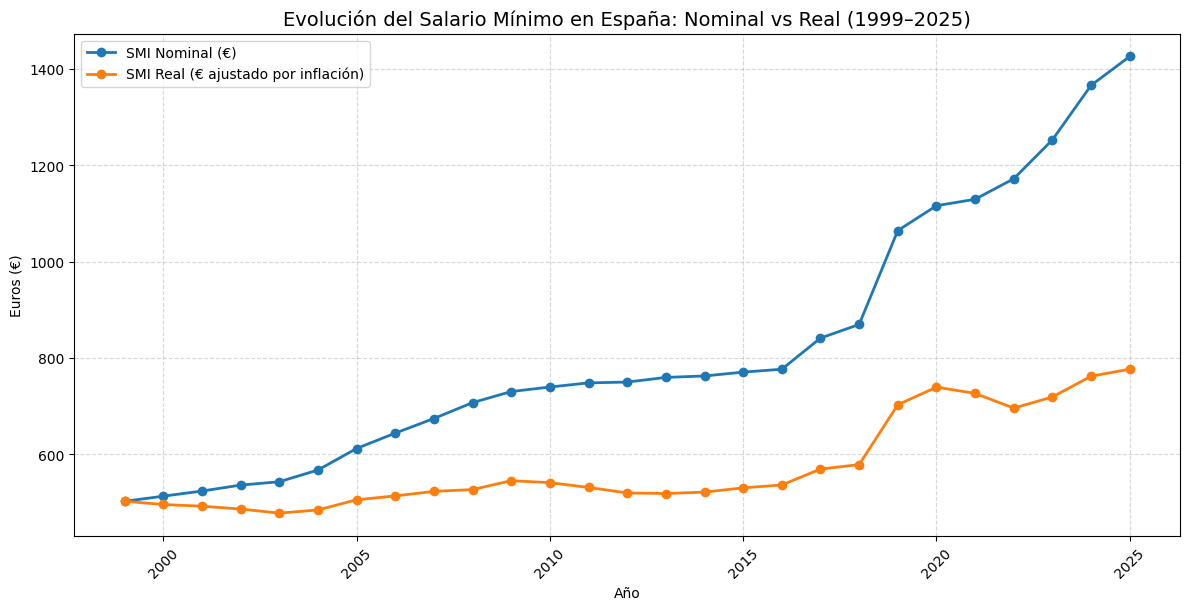

In [12]:
plt.figure(figsize=(12, 6))

# Línea del salario nominal
plt.plot(df_real['year'], df_real['smi_mensual'], marker='o', label='SMI Nominal (€)', linewidth=2)

# Línea del salario real
plt.plot(df_real['year'], df_real['smi_real'], marker='o', label='SMI Real (€ ajustado por inflación)', linewidth=2)

# Etiquetas y título
plt.title('Evolución del Salario Mínimo en España: Nominal vs Real (1999–2025)', fontsize=14)
plt.xlabel('Año')
plt.ylabel('Euros (€)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Conclusión del gráfico: Salario Mínimo Real vs Nominal**

El gráfico permite visualizar la evolución del salario mínimo en España tanto en términos nominales como reales (ajustado por inflación) entre los años 1999 y 2025.

A lo largo del período, se observa una tendencia creciente sostenida del salario mínimo nominal, con saltos importantes en años recientes, especialmente a partir de 2019.

En contraste, el salario mínimo real —es decir, el poder adquisitivo efectivo del salario— muestra un crecimiento más moderado y menos lineal, especialmente en años con alta inflación como 2022, donde incluso se evidencia una ligera caída real.

A pesar de esas fluctuaciones, el análisis muestra que el salario mínimo no solo ha crecido en términos nominales, sino también reales, manteniéndose por encima del nivel de poder adquisitivo del año base (1999). Esto sugiere una mejora sostenida del ingreso mínimo en términos de capacidad de compra, a lo largo del tiempo.

Sin embargo, este crecimiento real ha sido posible solo porque los aumentos salariales en ciertos años superaron ampliamente la inflación acumulada. De ahí la importancia de analizar ambas variables en conjunto para evaluar el impacto económico real sobre los trabajadores.

# 🧾 Conclusión general del análisis

A través de este estudio, se analizó la evolución del **salario mínimo mensual en España** desde 1999 hasta 2025 en relación con la **inflación anual acumulada**, con el objetivo de evaluar si los aumentos salariales representaron una mejora real en el poder adquisitivo de los trabajadores.

El análisis mostró que, si bien la inflación ha tenido una evolución volátil a lo largo de los años, el salario mínimo ha mantenido una **tendencia creciente sostenida**, especialmente a partir del año **2019**, donde se evidenciaron incrementos significativos por encima de la inflación.

En términos acumulados, el salario mínimo aumentó un **183,94%**, mientras que la inflación en el mismo período fue del **87,69%**. Esto indica que, en líneas generales, el salario mínimo **superó el crecimiento de los precios y, por lo tanto, se tradujo en una mejora del poder adquisitivo real**.

El cálculo del **salario mínimo real** confirmó esta tendencia positiva, aunque también evidenció momentos puntuales (como en 2022) en los que la alta inflación redujo temporalmente la capacidad de compra.

En conclusión, este análisis aporta evidencia cuantitativa de una **política salarial activa en favor de los trabajadores con ingresos más bajos**, lo cual representa un avance significativo desde el punto de vista económico y social.